# Exploring the correlation between overcrowding and community health using data from 3142 US counties in 2020

##    Project aim  
    
    This project will analyze and try to find if there is a correlation between population density and community health in US counties. In particular, community health will be measured using county data on several variables, which include the % of residents with fair or poor health, the average number of mentally unhealthy days, the average number of physically unhealthy days, % of adults with diabets, and the suicide rate. These variables balance between mental and physical health indicators, as both are important to overall community wellbeing. 

    The data used in my analysis come from John Davis’s dataset, a Biomechanics PhD Student at Indiana University, which gathered weather, health, and socioeconomic data  from 3142 US counties in 2020 to identify the most COVID-vulnerable communities in the country.  


In [1]:
pip install -q pyppetee

ERROR: Could not find a version that satisfies the requirement pyppetee (from versions: none)
ERROR: No matching distribution found for pyppetee
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
%matplotlib inline


url = 'us_county_sociohealth_data.csv' #this is the filepath for my data

data = pd.read_csv('us_county_sociohealth_data.csv')
#display(data)


select_columns = ['county', 'percent_overcrowding', 'population_density_per_sqmi', 'percent_rural', 'percent_fair_or_poor_health', 'primary_care_physicians_rate']

my_vars = data[select_columns] # filter data to use only the columns named in select_column

display(my_vars.describe()) # outputs the summary statistics for the dataframe my_vars

my_vars['primary_care_physicians_rate'].isnull().sum() #number of missing values under the primary care physician rate column

my_vars['percent_rural'].isnull().sum() 

my_vars['percent_overcrowding'].isnull().sum() 

my_vars['population_density_per_sqmi'].isnull().sum()

my_vars['percent_fair_or_poor_health'].isnull().sum()

mm = my_vars['primary_care_physicians_rate'] == 0

mt = my_vars['primary_care_physicians_rate'].isnull()

# based on the above sums it does not seem necessary to drop any counties for missing values

display(my_vars)


,percent_overcrowding,population_density_per_sqmi,percent_rural,percent_fair_or_poor_health,primary_care_physicians_rate
count,3144.000000,3144.000000,3137.000000,3144.000000,2997.000000
mean,2.419351,276.839299,58.547423,17.935375,54.522473
std,2.416937,1864.419086,31.502257,4.739056,35.270663
min,0.000000,0.038490,0.000000,8.120645,0.000000
25%,1.200000,16.802899,33.148700,14.321162,31.898850
50%,1.900000,44.998853,59.447686,17.215811,48.350050
75%,2.800000,116.775423,87.752861,20.922307,70.827800
max,51.400000,72167.635613,100.000000,40.990687,514.448340


,county,percent_overcrowding,population_density_per_sqmi,percent_rural,percent_fair_or_poor_health,primary_care_physicians_rate
0,Autauga,1.200000,92.605533,42.002162,20.882987,45.041800
1,Baldwin,1.300000,125.493187,42.279099,17.509134,72.897270
2,Barbour,1.700000,30.076538,67.789635,29.591802,31.658090
3,Bibb,0.300000,36.255444,68.352607,19.439724,48.526560
4,Blount,1.900000,89.490412,89.951502,21.745293,22.408770
...,...,...,...,...,...,...
3139,Uinta,3.400000,10.035892,43.095937,15.537464,43.913150
3140,Washakie,2.100000,3.730539,35.954529,15.955971,49.603170
3141,Weston,1.100000,2.991964,54.536626,13.934025,43.308790
3142,Kansas City,1.529774,525.284248,8.710926,16.402077,70.699170


## Summary Statistics

Count: counts the total number of observations for each variable

Mean: this takes all observations in a column and then divides by the count of the column (total number of observations). 
Example Interpretation : from all 3142 US counties the average population density per square mile in 2020 was ~277 people per square mile

Standard Deviation : For each variable, this measures how spread out the observations are from the mean. For instance, the std of population density is ~1864 people per square mile. It is helpful to interpret this number. A standard deviation of ~1864 people is large given the fact that our mean for this variable is only 277 people. 

minimum : this gives us the lowest observation value in a column. For instance, the county with the lowest amount of people per square mile had ~0.04 people per square mile


25%, 50%, 75% : these numbers indicate the interquartile range of each column of observations. For instance, the bottom 25% of counties had a population density of ~17 people or less, about half the counties had a population density of ~45 people per square mile or less, and counties in the top 75th percentile of counties in terms of said variabble had ~117 people per square mile or more.


maximum: this gives us the highest observation value in a column. For instance, the county with the most people per square mile had ~72,168 people per square mile. 








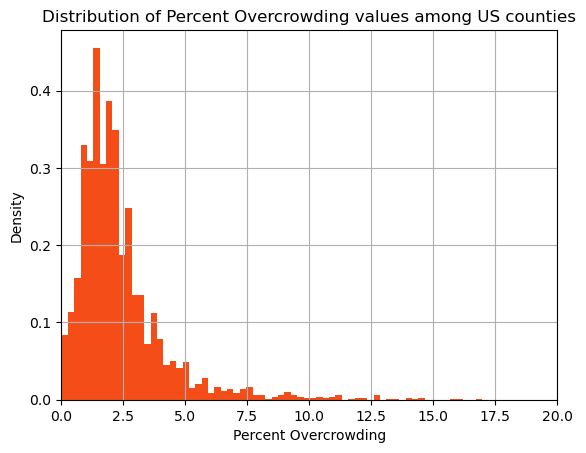

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Histograms for Percent Overcrowding values among US counties
my_vars["percent_overcrowding"].hist(bins=200, color=(244/255, 77/255, 24/255), density=True)
plt.xlabel("Percent Overcrowding")
plt.ylabel("Density")
plt.title("Distribution of Percent Overcrowding values among US counties")
plt.xlim(0, 20) #x-axis ticks range limited from 0-20%
plt.show()



##    Percent overcrowding 
    
    This measures the percentage of people within any given county that live in an overcrowded household. An overcrowded household, as measured in the original dataset, is defined as one in which there are 3 or more people per room, not including kitchen or bathroom. As opposed to population density, this reflects the living conditions within individual homes. 
    
    I picked this variable based off the assumption that overcrowding is more prevalent in densely populated areas. Although the 2 measures; population density and overcrowding, are not synonymous, populations often outstrip the supply of land and sufficiently spacious housing in denser areas. As a result, overcrowding rates would seem to tie closely to my research questions focus on population density. 
    
    In terms of outcomes, overcrowding has been shown to correlate to factors of community health such as higher rates of spread of disease and infection. It also seems worthwhile exploring the correlation between crowded living conditions and symptoms of distress/mental illness as it is plausible that there is a relationship among these variables. In general,  this variable establishes population density at the household level and clearly defines what counts as overpopulated. This precision, for the purpose of my analysis,  makes it easier to find any relationships between population desnity and community health outcomes
    
    As can be seen from the histogram above, the distribution of proportion of overcrowded households among all US counties is very right skewed, with most rates being between 0-5%. The number of counties with rates above 20% is marginal and few which is why the figure is zoomed in such that the x-axis ends at 20. Orignallly though, the axis would have stretched no further than 55% as the maximum percent overcrowing value was 51% among US counties according to our summary statistics table. 
    


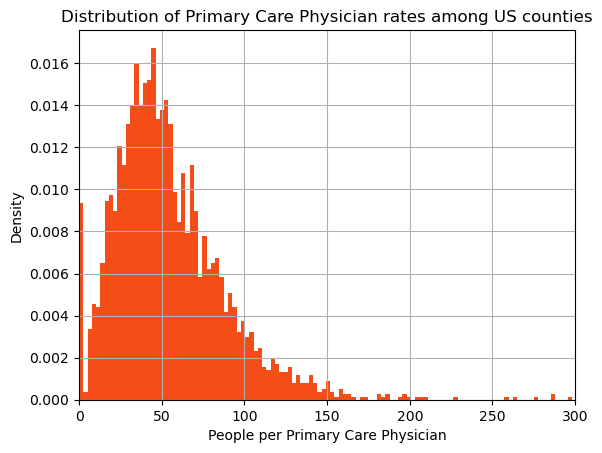

In [4]:
my_vars["primary_care_physicians_rate"].hist(bins=200, color=(244/255, 77/255, 24/255), density=True)
plt.xlabel("People per Primary Care Physician")
plt.ylabel("Density")
plt.title("Distribution of Primary Care Physician rates among US counties")
plt.xlim(0, 300)
plt.show()

##    Primary care physician rate 
    
    This measures how many people there are per physician in a US county. I am including this variable on the assumption that areas with more people tend to have more people per physician. So more people per physician could be an indicator of more densely populated counties. Going further, it would be interesting to see if there is a relationship between this variable and community health because there may be a correlation, in some counties, between the number of doctors available for the population and health outcomes, in this case, how residents of the counties score their own health.
    
    The histogram above is also right skewed but to a lesser degree than the histogram for the percent overcrowding variable. Most of the data is between 0-150 people per primary care Physician, with any values above 300 being marginal hence the upper limit of the x-axis. Orgignally though, the data stretched to 600 as the maximum people per physician for a county in the US was 572.


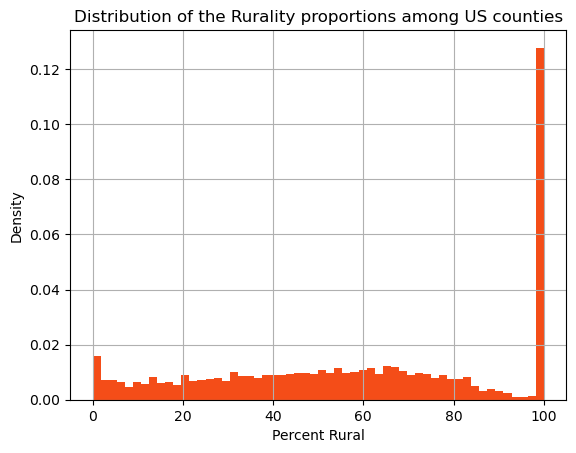

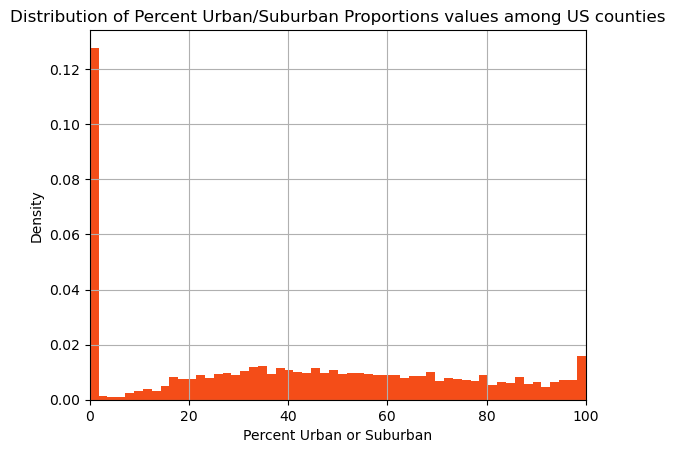

In [5]:
my_vars["percent_rural"].hist(bins=56, color=(244/255, 77/255, 24/255), density=True)
plt.xlabel("Percent Rural")
plt.ylabel("Density")
plt.title("Distribution of the Rurality proportions among US counties")
plt.show()

data['percent_suburb/urb'] = 100-data['percent_rural'] 
# new explanatory variable: complement of Percent Rural, places that are suburban or urban
data['percent_suburb/urb'].hist(bins = 56, color=(244/255, 77/255, 24/255), density=True)
plt.xlabel("Percent Urban or Suburban")
plt.ylabel("Density")
plt.title("Distribution of Percent Urban/Suburban Proportions values among US counties")
plt.xlim(0, 100)
plt.show()

##    Percent rural 

    This measures the percentage of the population and households that do not live in an urban area. This would mean having less than 2500 residents in any area that is census designated by the US Census Bureau. Since this variable reflects pretty much the inverse of suburb/urban living proportions, it gives insight into the outcomes of those living outside dense areas which provides contrast in the face of my other explanatory variables such as percent overcrowding where the focus would be on the more crowded areas and their relationship with health outcomes. 
    
    As well, the distinction between rural and urban is a simple determinant of population density levels which connects smoothly to my research question.
    The histograms show that the distribution of rurality rates among counties is relativel uniform except at zero and 100. A significant amount of counties are close to 100% rural according to the figure. A good proportion of counties are also 0% rural which is why the bar height at zero is ditinguishably increased in comparison to the other uniform values. Due to the spike at 100% though, it would be safe to assume that the histogram for this variable is unimodal.
    
    One thing I added was a histogram for the rate of suburb/urbanity amongst US counties. I calculate this variable by just taking the complement of the percent rural variable. My reasoning behind this was that areas are classified according to the 3 categories; suburban, urban, and rural. So not being rural would mean being one of the other 2. The histogram, as would be expected, gives the reverse of percent rural with the mode being at zero instead of 100. 


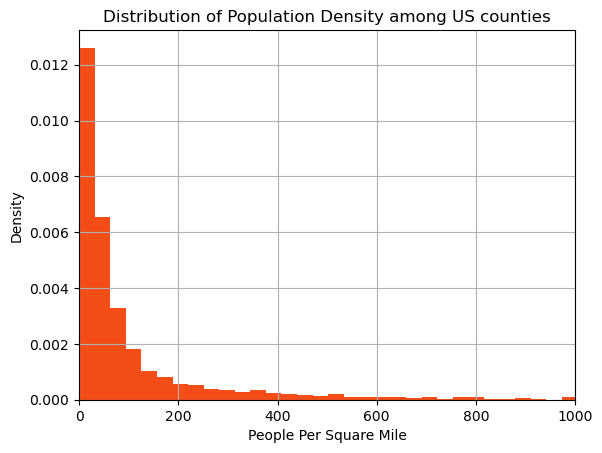

In [11]:
my_vars["population_density_per_sqmi"].hist(bins=2300, color=(244/255, 77/255, 24/255), density=True)
plt.xlabel("People Per Square Mile")
plt.ylabel("Density")
plt.xlim(0,1000)
plt.title("Distribution of Population Density among US counties")
plt.show()

##    Population density 
    
    This measures the number of people per square mile in the US and is simply derived by dividing county population by the area of land in square miles within said county. 
    
    Population density is my projects main focus in terms of explanatory variables impacting community health (urban vs rural, crowded vs uncrowded). It can be assumed that the spread of disease and infection, for instance, relates strongly to the density of an area. In addition, it seems plausible that in places where there are more people the ensuing competition for access to services and goods, for example primary care physicians,  may further influence physical health which connects to the community health outcomes my analysis is interested in finding. 
    
    It is also plausible that levels of overpopulation may correlate to mental distress/illness as a result of the common feelings of congestion that may arise which makes Mental health indicators an important aspect of community health outcomes. 
    On the other hand, it is possible that greater funding for public service, facilities, and social services in denser areas would also impact community health indicators. 
    
    The histogram is extremely right skewed with most the values for counties falling between 0-250 people. Although there are some outliers, case in point - the maximum value of 72000 people per square mile in one county, the number of values past 1000 are marginal which is why the figure is zoomed in to have an upper limit on the x-axis at 1000. Due to extreme skew, I also used a very large bin count to try and get a clearer picture of the distribution


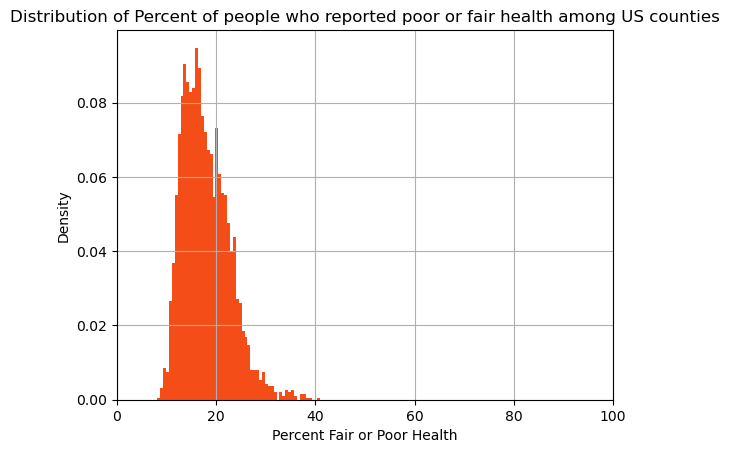

In [7]:
my_vars['percent_fair_or_poor_health']. hist(bins = 56, color=(244/255, 77/255, 24/255), density=True)
# this is my Y variable which I am using to measure community health outcomes
plt.xlabel("Percent Fair or Poor Health")
plt.ylabel("Density")
plt.title("Distribution of Percent of people who reported poor or fair health among US counties")
plt.xlim(0, 100)
plt.show()

##    Y variable: Percent fair or poor health 
    
    This measures the percentage of residents within a county that self-reported poor or fair health when asked in a survey where the possible responses were excellent, very good, good, fair, and poor. 
    I feel that this is a good variable to start with when trying to measure community health because it is very general. That is to say, it does not focus on, for instance, diabetes rates, and makes no distinction between physical and mental health differences. So starting with this variable paints a general picture of which areas believe they are healthy/less healthy. 
    
    Since the values are self-reported,collecting data for this variable was easier as smaller samples sufficed. This is reflected by the fact that there are no missing values for this variable as well which makes it easier to utilize when trying to measure correlation with my explanatory variables.
    
    The histogram apprears to be very close to normal in its distribution, exhibiting a slight right skew. So the proportion of people reporting poor health among US counties is relatively normal and centered around a median of a little less than 20% .


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


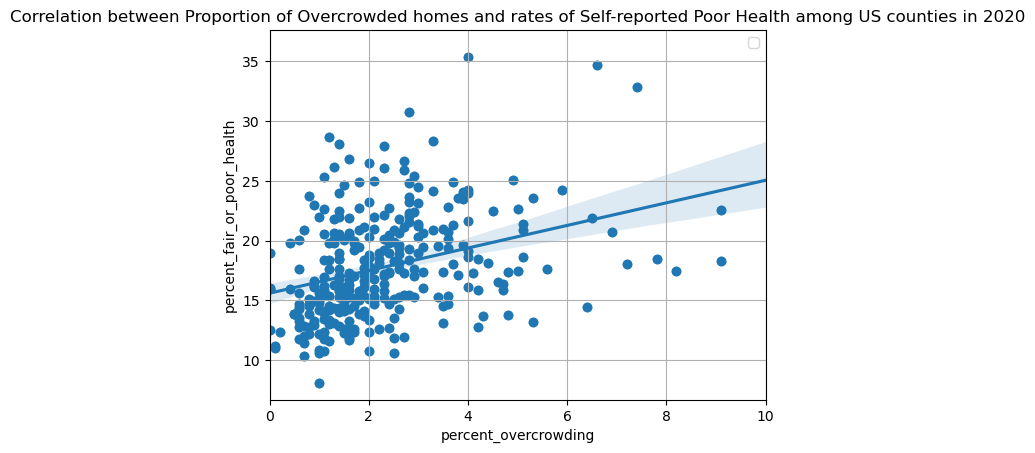

In [8]:
import seaborn as sns

subset = my_vars.sample(frac=0.1)  # Sample 10% of the data
plt.scatter(subset['percent_overcrowding'], subset['percent_fair_or_poor_health'])
#scatter plot inspecting correlation between percent overcrowding and percent fair or poor health

plt.title('Correlation between Proportion of Overcrowded homes and rates of Self-reported Poor Health among US counties in 2020')
plt.xlabel('Percent Overcrowding')
plt.ylabel('Percent Fair or Poor Health')
plt.xlim(0,10) # Zoom in on counties that have between 0-10% overcrowding rates
plt.legend()
plt.grid(True)
sns.regplot(x='percent_overcrowding', y='percent_fair_or_poor_health', data=subset) # plots regression line
plt.show()



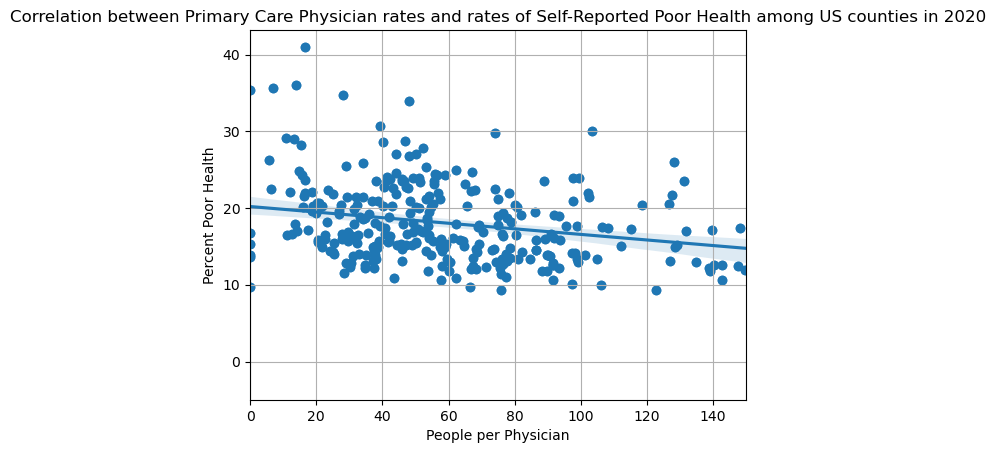

In [9]:
subset = my_vars.sample(frac=0.1)  # sample 10% of the data
plt.scatter(subset['primary_care_physicians_rate'], subset['percent_fair_or_poor_health'])

plt.title('Correlation between Primary Care Physician rates and rates of Self-Reported Poor Health among US counties in 2020')
plt.xlim(0,150) 
plt.grid(True)
sns.regplot(x='primary_care_physicians_rate', y='percent_fair_or_poor_health', data=subset)
plt.xlabel('People per Physician')
plt.ylabel('Percent Poor Health')
plt.show()

Text(-9.450125555555559, 17.4501945957, '10 least dense in blue')

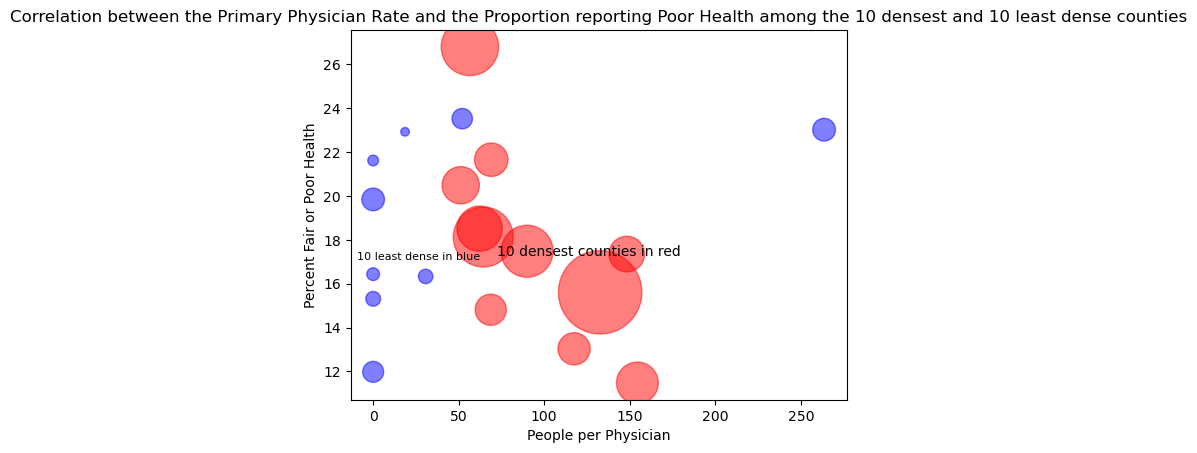

In [10]:
sorted_data = my_vars.sort_values(by='population_density_per_sqmi') # sorting my values by population density

# Select the 10 smallest and 10 largest population densities
small_subset = sorted_data.head(10)
large_subset = sorted_data.tail(11)

# grouping the 10 densest and least dense counties by Physician rates
# bubble plot for the smallest population densities (blue color)
plt.scatter(small_subset['primary_care_physicians_rate'], small_subset['percent_fair_or_poor_health'], s=small_subset['population_density_per_sqmi']*1000, alpha=0.5, color='blue', label='Smallest')

# bubble plot for the largest population densities (red color)
plt.scatter(large_subset['primary_care_physicians_rate'], large_subset['percent_fair_or_poor_health'], s=large_subset['population_density_per_sqmi']*0.05, alpha=0.5, color='red', label='Largest')

plt.xlabel("People per Physician")
plt.ylabel("Percent Fair or Poor Health")
plt.title("Correlation between the Primary Physician Rate and the Proportion reporting Poor Health among the 10 densest and 10 least dense counties")

# Add label for the 10 biggest at the mean position
mean_x = large_subset['primary_care_physicians_rate'].mean() - 20 # shift left by 20 units
mean_y = large_subset['percent_fair_or_poor_health'].mean()

plt.text(mean_x, mean_y, '10 densest counties in red', color='black', ha='left', va='top', fontsize=10, verticalalignment='bottom')

# Add label for the 10 smallest at the mean position
mean_x = small_subset['primary_care_physicians_rate'].mean() -50 
mean_y = small_subset['percent_fair_or_poor_health'].mean() -1.0 # shift label down by 1.5 units

plt.text(mean_x, mean_y, '10 least dense in blue', color='black', ha='left', va='top', fontsize=8, verticalalignment='bottom')


##    Conclusion

    The first Scatter plots the correlation between the proportion of overcrowded homes among US counties and the associated proportion of residents who self-reported poor or fair health in said county. 

    The 3142 data points for which there is available data causes significant overplotting which makes the figure unattractive and difficult to read. As a response to said issues, I decided to take a random sample of 10% of total counties using the .sample() function. I mark in my code where this is implemented. Statistically speaking, a sample size of 10% is considered strong for avoiding sampling error. So the results provided by the sample can be considered representative of the overall population. 

    As established with the histogram of the percent overcrowding variable, most values are between 0-5%, this is true in the case of the sample as well. So, I zoomed in on the scatter plot, making the upper limit of the x-axis 5%. This focused on the area where nearly all the data points were located allowing for a more meaningful reading.
    
    Looking at the regression line for the 2 variables; percent overcrowding and percent fair or poor health, a strongly positive relationship becomes apparent. Meaning, US counties with a higher proportion of overcrowded households typically had a greater proportion of residents reporting poor or fair health in comparison to US counties with lower proportions of overcrowded households. 

    In terms of the primary care physicians rate, when again taking the necessary sample size to avoid overplotting and zooming in on the relevant parts of the scatter figure, what results is a strongly negative correlation between the explanatory variable and percent fair/poor health. This would be interpreted as counties with more people per doctor having lower proportions of residents reporting fair or poor health. 

    The third figure is a bubble chart which takes the 10 most dense counties by population and the 10 least dense then plots them according to where they fall on the primary physician rate and percent fair/poor health correlation map. 

    Desnsity is exhibited here by bubble size, bigger counties equal bigger bubbles, while color is also used to differentiate the 10 smallest counties by population density (blue) and 10 largest (red). 

    There are a few interesting insights that the figure provides. Generally, the denser counties tended to have more people per physician. When it came to correlating such with the proportion reporting poor/fair health though, one could see that the most dense county had one of the lowest proportions of residents reporting bad health (~15%) while the least dense county had one of the highest rates (~23%). In fact, more than half of the least dense counties reported rates of poor health that were 20% or above while the same could be said for only 3 of the densest counties. 
